In [1]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)
from bsmodel import BSModel
import numpy as np
import matplotlib.pyplot as plt
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider

In [2]:
homedir = "/Users/edward/" # "/mnt/c/Users/jccer/"
bs.set_bridgestan_path(homedir + "bridgestan")

In [3]:
bs_model= BSModel(stan_file = homedir + "mcmcexperiments/stan/normal.stan",
                   data_file = homedir + "mcmcexperiments/stan/normal.json")

/Users/edward/venvs/py3/lib/python3.12/site-packages/bridgestan/model.py:177: RuntimeWarning: The version of the compiled model does not match the version of the Python package. Consider recompiling the model.
  warnings.warn(


In [76]:
N = 201
limit = 7
x = np.linspace(-limit, limit, N)
y = np.linspace(-limit, limit, N)

In [77]:
z = np.zeros(2)
Z = np.zeros((N, N))
for ix, xn in enumerate(x):
    for iy, yn in enumerate(y):
        z[0] = xn
        z[1] = yn
        Z[ix, iy] = bs_model.log_density(z)

In [87]:
def random_point(rng):
    m = np.zeros(2)
    S = np.eye(2)
    return rng.multivariate_normal(m, S)

def random_direction(rng):
    x = random_point(rng)
    return x / np.linalg.norm(x)

def to_line(rho, x, o):
    return x.reshape(-1) * rho + o

In [88]:
rng = np.random.default_rng()

In [127]:
p = random_point(rng) # p = np.array([-4, 2])
rho = random_direction(rng)
line = np.array([to_line(rho, x[n], p) for n in range(N)]) # list comprehension
fx = np.array([np.exp(bs_model.log_density(line[n])) for n in range(N)])

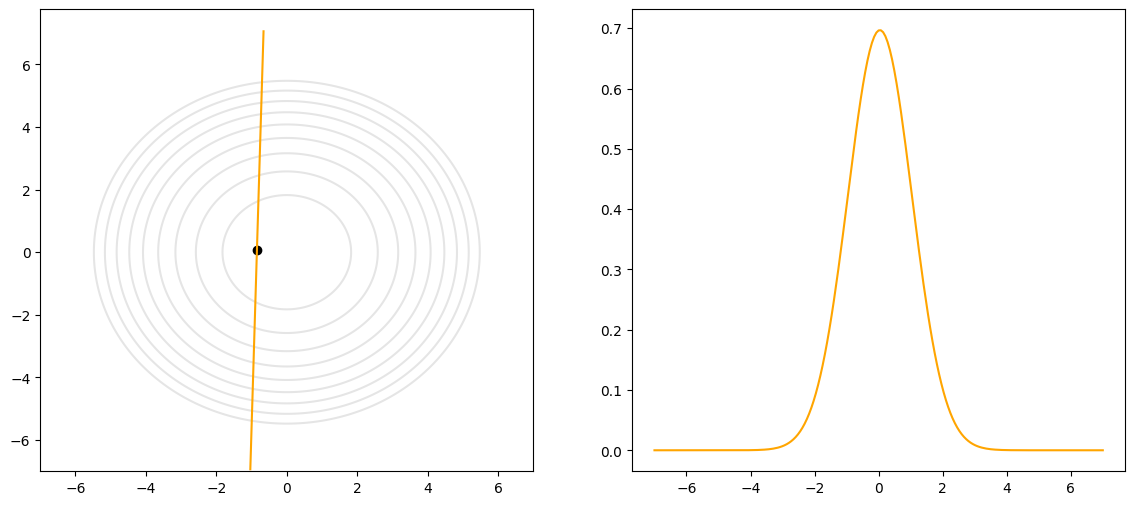

In [128]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].contour(x, y, Z, levels = np.linspace(-15, 0, 10),
           colors = "black", linestyles = "solid", alpha = 0.1)
axs[0].scatter(p[0], p[1], color = "black")
axs[0].plot(line[:, 0], line[:, 1], color = "orange")
axs[1].plot(x, fx, color = "orange")